## Chapter 4. 머신러닝에 필요한 수학의 기본

### 4.1 벡터

- 넘파이 라이브러리 import

In [50]:
import numpy as np

- 요소가 2,1인 벡터 정의

 1차원ndarray 형은 가로, 세로를 구분 않고 항상 가로 벡터로 표시함


In [51]:
a = np.array([2,1])
print(a)

[2 1]


- type()을 사용하여 numpy.ndarray 형임을 확인

In [52]:
type(a)

numpy.ndarray

- 2x2 크기의 2차원 배열(행렬) 

In [53]:
c = np.array([ [1,2], [3,4] ])
print(c)

[[1 2]
 [3 4]]


- 세로 벡터를 2차원 형태로 나타내는 방법

In [54]:
d = np.array([ [1], [2] ])
print(d)

[[1]
 [2]]


- 전치 나타내기: `변수명.T`

In [55]:
print(d.T)

[[1 2]]


- 벡터의 덧셈과 뺄셈 연산 

    - 각 위치의 요소끼리 연산됨

    - 따라서 리스트 형이 아닌 벡터로 다루어지고 있음알 알 수 있다. (리스트형이었으면 두 항목이 연결되었을 것)

In [56]:
a = np.array([2,1])
b = np.array([1,3])
print(a+b)

[3 4]


In [57]:
a = np.array([2,1])
b = np.array([1,3])
print(a-b)

[ 1 -2]


- 스칼라의 곱셈

In [58]:
print(2 * a)

[4 2]


- 내적 계산: `변수명1.dot(변수명2)`
 
     (기하학적 의미: b를 c로 투영한 벡터를 b'으로 하여 b'와 c의 길이를 곱해 합한 것)

In [59]:
b = np.array([1,3])
c = np.array([4,2])
print(b.dot(c))

10


#### <font color=blue> 내적은 두 벡터의 유사성과 관련  </font>

- **내적이 큰 값**을 갖는 경우: 두 벡터가 비슷한 방향일 때
- **내적이 작은 값**을 갖는 경우: 두 벡터가 수직에 가까울 때
- **내적이 0값**일 경우: 두 벡터가 수직일 때

- 벡터의 크기 구하기: `np.linalg.norm()`

    (각 요소값을 제곱하여 합하고 루트씌우는 연산과 같음)

In [60]:
a = np.array([1,3])
print(np.linalg.norm(a))

3.1622776601683795


### 4.2 합의 기호

- 합을 내적으로 계산하기
    - `np.ones()` : 1로 초기화된 shape 차원의 ndarray배열 객체를 반환
    - `numpy.arange()` : 빈 열린 구간에서 (step의 크기만큼 일정하게 떨어진 숫자들을) array 형태로 반환해 주는 함수
    - `a.dot(b)` : a와 b의 내적

In [61]:
import numpy as np
a = np.ones(1000) 
b = np.arange(1, 1001) #1부터 1000까지 요소들의 array (만약 step 지정하고싶으면 가운데에 추가 (start, step, end))
print(a.dot(b))

500500.0


### 4.3 곱의 기호
### 4.4 미분
### 4.5 편미분
- 편미분: 하나의 변수만, 다른 변수는 모두 상수라고 간주하여 미분하는 것
- 복수의 변수를 갖는 함수의 예:$f(w_{0}, w_{1}) = w_{0}^2 + 2w_{1}*w_{0} + 3$
- 편미분에 의해 $(w_{0}, w_{1})$ 두 방향의 기울기를 세트로 하여 벡터 해석 가능
- 이것을 **f의 w에 대한 경사(기울기벡터, gradient)**라고 부름
- 경사는 기울기가 가장 큰 방향과 그 크기를 나타냄

#### 실제 경사도를 그림으로 나타내기
- (A): 함수 f 정의
- (B): w0 방향의 편미분을 리턴하는 함수 dff_dw0 정의
- (C): w1 방향의 편미분을 리턴하는 함수 dff_dw1 정의
- (D): 격자 모양으로 나눈 w0과 w1을 2차원 배열 ww0과 ww1에 저장
- (E): ww0과 ww1에 대한 f와 편미분값 계산하여 ff, dff_dw0, dff_dw1에 저장
- (F): ff가 등고선을 표시
- (G): 경사 벡터를 화살표로 표시

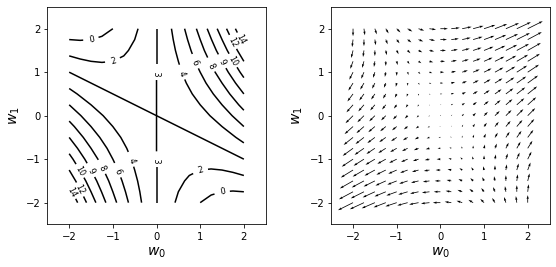

In [62]:
import numpy as np
import matplotlib.pyplot as plt

def f(w0, w1): # (A) f 정의
    return w0**2 + 2 * w0 * w1 + 3
def df_dw0(w0,w1): # (B) f의 w0에 관한 편미분
    return 2 * w0 + 2 * w1
def df_dw1(w0,w1): # (C) f의 w1에 관한 편미분
    return 2 * w0 + 0 * w1

w_range = 2
dw=0.25
w0 = np.arange(-w_range, w_range + dw, dw)
w1 = np.arange(-w_range, w_range + dw, dw)
wn = w0.shape[0]
ww0, ww1 = np.meshgrid(w0, w1) # (D) 격자 그리드 만들기
ff = np.zeros( (len(w0), len(w1)) )
dff_dw0 = np.zeros( (len(w0), len(w1)) )
dff_dw1 = np.zeros( (len(w0), len(w1)) )

for i0 in range(wn): # (E)
    for i1 in range(wn):
        ff[i1, i0] = f(w0[i0], w1[i1] )
        dff_dw0[i1, i0] = df_dw0( w0[i0], w1[i1] )
        dff_dw1[i1, i0] = df_dw1( w0[i0], w1[i1] )

plt.figure(figsize=(9,4))
plt.subplots_adjust(wspace=0.3)

plt.subplot(1,2,1)
cont = plt.contour(ww0, ww1, ff, 10, colors='k') # (F) f의 등고선 표시
cont.clabel(fmt='%2.0f', fontsize=8) #등고선 플롯 고도각에 label 지정
plt.xticks(range(-w_range, w_range + 1, 1))
plt.yticks(range(-w_range, w_range + 1, 1))
plt.xlim(-w_range - 0.5, w_range + .5)
plt.ylim(-w_range - .5, w_range + .5)
plt.xlabel('$w_0$', fontsize=14)
plt.ylabel('$w_1$', fontsize=14)

plt.subplot(1,2,2)
plt.quiver(ww0, ww1, dff_dw0, dff_dw1) # (G) f의 경사 벡터 표시
plt.xlabel('$w_0$', fontsize=14)
plt.ylabel('$w_1$', fontsize=14)
plt.xticks(range(-w_range, w_range + 1, 1))
plt.yticks(range(-w_range, w_range + 1, 1))
plt.xlim(-w_range - 0.5, w_range + .5)
plt.ylim(-w_range - .5, w_range + .5)
plt.show()

#### 결과 해석
- 왼쪽의 등고선 plot의 수치를 보면 f는 오른쪽 위와 왼쪽 아래가 높고, 왼쪽 위와 오른쪽 아래가 낮은 지형
- 오른쪽 그래프가 지형의 경사이고 화살표는 각 점에서 경사가 높은 쪽을 향함
- 경사가 가파른 정도, 즉 등고선의 간격이 좁을수록 화살표가 길다.
- 어느 지점에서 시작하더라도 화살표를 따라가면 그래프의 보다 높은 부분으로 진행됨
- 이렇게 경사는 함수의 최대점과 최소점을 찾는 데 중요한 개념임(머신러닝에서는 오차 함수의 최소점을 구하기 위해 오차 함수의 경사를 계산)

### 4.6 행렬

- np.array를 사용하여 행렬 정의
- 벡터를 정의할 때 : `np.array([1,2,3])` 처럼 한 쌍의 []만 정의
- 행렬을 정의할 때 : 먼저 각 행을 [] 로 묶고 전체를 []로 묶는 이중 구조

In [63]:
import numpy as np

In [64]:
A = np.array([[1,2,3], [4,5,6]])
print(A)

[[1 2 3]
 [4 5 6]]


In [65]:
B = np.array([[7,8,9], [10,11,12]])
print(B)

[[ 7  8  9]
 [10 11 12]]



- 덧셈, 뺄셈, 스칼라배 연산 : 동일하게 `A+B`, `A-B`, `n*A`

In [66]:
print(A + B)
print(A - B)

[[ 8 10 12]
 [14 16 18]]
[[-6 -6 -6]
 [-6 -6 -6]]


In [67]:
A = np.array([ [1,2,3], [4,5,6] ])
print(2*A)

[[ 2  4  6]
 [ 8 10 12]]


- `A.dot(B)`와 `*`과의 차이
    - `A.dot(B)` : 내적에 국한되지 않고 행렬의 곱을 계산하는 연산
    - 파이썬에서 행렬을 곱할때는 방향이 자동으로 조절됨
    - 아래의 경우, B는 세로 벡터로 해석되어 내적이 계산됨
    - 보통의 곱셈 기호 `*`를 사용하면 대응되는 요소끼리의 곱셈 수행

In [68]:
A = np.array([1,2,3])
B = np.array([4,5,6])
print(A.dot(B)) #내적

32


In [69]:
A = np.array([1,2,3])
B = np.array([4,5,6])
print(A * B) #요소끼리의 곱

[ 4 10 18]


- `/`:  해당 요소끼리 나눗셈

In [70]:
A = np.array([1,2,3])
B = np.array([4,5,6])
print(A / B)

[0.25 0.4  0.5 ]


- L x M 행렬과 M x N 행렬의 곱
    - 일반적으로 A가 L x M 행렬이고 B는 M x N 행렬일 때 AB의 크기는 L x N
    - A의 열의 수= B의 행의 수
    - AB != BA (스칼라배와 다르게 행렬곱은 교환법칙 성립 안함)

In [71]:
A = np.array([ [1,2,3], [-1,-2,-3] ])
B = np.array([ [4, -4], [5 ,-5], [6, -6] ])
print(A.dot(B))

[[ 32 -32]
 [-32  32]]


- `np.identity(n)`: n x n 단위 행렬 생성
    - 각 요소에 붙은 `.`: 소수도 나타낼 수 있는 float 형임을 의미
    - 단위 행렬은 스칼라의 1과 비슷하다.
    - 어떤 행렬에 단위 행렬을 곱해도 행렬은 변경되지 않는다.

In [72]:
print(np.identity(3))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [73]:
A = np.array([ [1,2,3], [4,5,6], [7,8,9] ])
I = np.identity(3)
print(A.dot(I))

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


### 4.6 역행렬

- `np.linalg.inv(A)` : A의 역행렬을 구할 수 있다.
- 역행렬이 존재하지 않는 행렬도 있음을 주의 (분수의 분모가 0이 되어 버림)

In [74]:
A = np.array([ [1,2], [3,4]])
invA = np.linalg.inv(A)
print(invA)

[[-2.   1. ]
 [ 1.5 -0.5]]


- `A.T`: 전치하여 가로벡터를 세로벡터로, 세로벡터를 가로벡터로 만듦

In [75]:
A = np.array([ [1,2,3], [4,5,6] ])
print(A)
print(A.T)

[[1 2 3]
 [4 5 6]]
[[1 4]
 [2 5]
 [3 6]]


### 4.7 지수 함수와 로그 함수

#### 지수함수
- `a>1` 인 경우: 단조 증가 그래프
- `0<a<1` 인 경우는 단조 감소 함수
- 밑 a가 클수록 그래프는 급격히 증가함
- 지수 함수의 y값은 항상 0보다 크다 (그래서 모두 양수로 옮기는 역할을 하는 함수)

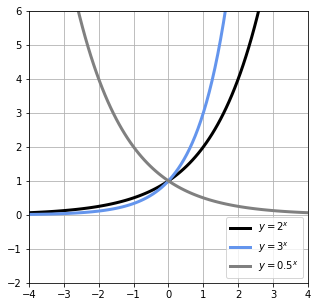

In [76]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

x = np.linspace(-4, 4, 100)
y = 2**x
y2 = 3**x
y3 = 0.5**x

plt.figure(figsize=(5,5))
plt.plot(x,y, 'black', linewidth=3, label='$y=2^x$')
plt.plot(x, y2, 'cornflowerblue', linewidth=3, label='$y=3^x$')
plt.plot(x, y3, 'gray', linewidth=3, label='$y=0.5^x$')
plt.ylim(-2, 6)
plt.xlim(-4, 4)
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

#### 로그함수

- 밑이 2인log 그래프를 그림(y2)
- $y= a^x$ 그래프와 y=x 선에서 대칭 (지수함수, 로그함수는 서로 역함수 관계니까)


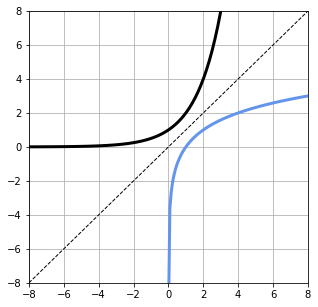

In [89]:
x = np.linspace(-8,8,100)
y = 2**x #지수함수

x2 = np.linspace(0.001, 8, 100) 
y2 = np.log(x2) / np.log(2) #로그함수
plt.figure(figsize=(5,5))  
plt.plot(x,y,'black',linewidth=3)#지수함수가 블랙
plt.plot(x2,y2, 'cornflowerblue', linewidth=3) #로그함수가 블루
plt.plot(x,x,'black', linestyle='--', linewidth=1)
plt.ylim(-8, 8)
plt.xlim(-8,8)
plt.grid(True)
plt.show()

#### $y = (x-1)^2 + 2$ 라는 함수에 log를 취해서 비교해 봄
- 로그를 취해도 최솟값일 때의 x값은 변하지 않는다. 
- $min f(x)$ 는 $f(x)$의 최솟값을 의미한다. 
- $argmin f(x)$는 $f(x)$가 최솟값을 취하는 a 라는 뜻.
- 아래 그래프에서는 log를 취하기 전 후 모두 최솟값일때의 x가 1로 동일함

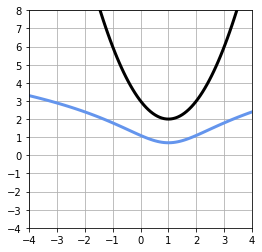

In [88]:
x = np.linspace(-4, 4, 100)
y = (x - 1)**2 + 2
logy = np.log(y)

plt.figure(figsize=(4,4))
plt.plot(x,y,'black', linewidth=3) #로그안취한게 블랙

plt.plot(x, logy, 'cornflowerblue', linewidth=3) #로그취한게 블루
plt.yticks(range(-4,9,1))
plt.xticks(range(-4,5,1))
plt.ylim(-4, 8)
plt.xlim(-4, 4)
plt.grid(True)
plt.show()

#### 지수 함수의 미분
- $a=e$의 경우 미분해도 함수의 형태가 변하지 않는다.

- 이러한 성질 때문에 시그모이드, 소프트맥스, 가우스 함수에서 $e\$를 사용한다.

- 코드에서 a=2로 두었는데 실제 $e\$값 (2.71xxxx)에 가깝게 설정할수록 회색, 검정 그래프가 겹침

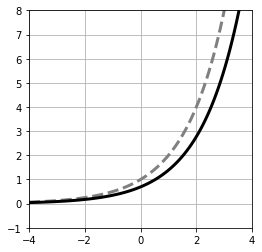

In [98]:
x = np.linspace(-4, 4, 100)
a = 2
y = a**x
dy = np.log(a) * y

plt.figure(figsize=(4,4))
plt.plot(x,y,'gray', linestyle='--', linewidth=3) #미분전
plt.plot(x, dy, color='black', linewidth=3) #미분 후
plt.ylim(-1, 8)
plt.xlim(-4, 4)
plt.grid(True)
plt.show()

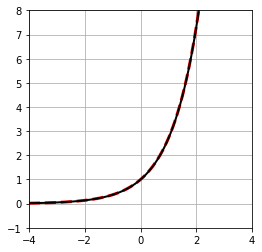

In [107]:
x = np.linspace(-4, 4, 100)
a = 2.71
y = a**x
dy = np.log(a) * y

plt.figure(figsize=(4,4))
plt.plot(x,y,'r', linestyle='--', linewidth=3) #미분전
plt.plot(x, dy, color='black', linewidth=2) #미분 후
plt.ylim(-1, 8)
plt.xlim(-4, 4)
plt.grid(True)
plt.show()

#### 로그 함수의 미분
- 로그함수의 미분은 반비례가 된다.
- np.log(x)를 미분하면 $1/x$가 된다. 

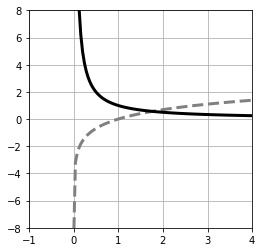

In [80]:
x = np.linspace(0.0001, 4, 100) # 0 이하로 정의할 수 없는.
y = np.log(x)
dy = 1 / x

plt.figure(figsize=(4,4))
plt.plot(x,y, 'gray', linestyle='--', linewidth=3) #로그함수 시각화
plt.plot(x, dy, color='black', linewidth=3) #미분한 로그함수 (1/x 시각화)
plt.ylim(-8, 8)
plt.xlim(-1, 4)
plt.grid(True)
plt.show()

#### 시그모이드 함수
- 음에서 양의 실수를 0~1 사이로 반환해서 확률로 표현해야 할 때 자주 사용됨
- 분류 문제로 등장, 신경망 뉴런의 특성을 나타내는 중요한 함수로도 쓰임

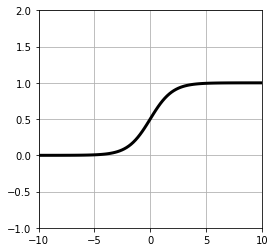

In [81]:
x = np.linspace(-10, 10, 100)
y = 1 / (1 + np.exp(-x))

plt.figure(figsize=(4,4))
plt.plot(x,y, 'black', linewidth=3)

plt.ylim(-1,2 )
plt.xlim(-10,10)
plt.grid(True)
plt.show()

#### 소프트맥스 함수
- 복수 값의 대소 관계를 유지하면서, 확률로서의 값(각각의 값은 0~1로, 합은 1)로 변환하는 함수
- 다변수일 때도 사용 가능
- 다 합하면 1임
- 시그모이드 함수를 다변수로 확장한 것이 소프트맥스 함수

In [90]:
def softmax(x0,x1,x2):
    u = np.exp(x0) + np.exp(x1) + np.exp(x2)
    return np.exp(x0) / u, np.exp(x1) / u, np.exp(x2) / u

#test
y = softmax(2, 1, -1)
print(np.round(y,2)) # (A) 소수점 2자리로 표시
print(np.sum(y)) # (B) 합계는 1

[0.71 0.26 0.04]
1.0


- $softmax$ 함수를 3차원 그림으로 시각화
- $x_{2} = 1$로 고정하면 $y_{0}, y_{1}$ 은 0과 1사이의 값으로 변화함
- $x_{0}$이 커지면 $y_{0}$은 1에 가까워지고  $x_{1}$이 커지면 $y_{1}$이 1에 가까워진다.

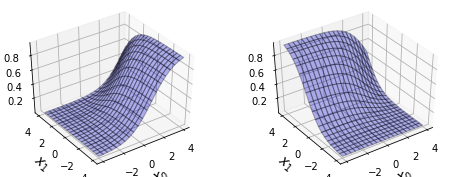

In [83]:
from mpl_toolkits.mplot3d import Axes3D

xn = 20
x0 = np.linspace(-4, 4, xn)
x1 = np.linspace(-4, 4, xn)

y = np.zeros( (xn, xn, 3) )
for i0 in range(xn):
    for i1 in range(xn):
        y[i1, i0, :] = softmax( x0[i0], x1[i1], 1)

xx0, xx1 = np.meshgrid(x0, x1)
plt.figure(figsize=(8,3))
for i in range(2):
    ax = plt.subplot(1, 2, i + 1, projection='3d')
    ax.plot_surface(xx0, xx1, y[:, :, i], rstride=1, cstride=1, alpha=0.3, color='blue', edgecolor='black')
    ax.set_xlabel('$x_0$', fontsize=14)
    ax.set_ylabel('$x_1$', fontsize=14)
    ax.view_init(40, -125)

plt.show()

#### 가우스 함수
$$ f(x) = \frac{1} {\sqrt{2\pi}\sigma} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right) , ~~ -\infty<x<\infty$$
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/440px-Normal_Distribution_PDF.svg.png" width=400>

- 확률론과 통계학에서 정규 분포 또는 가우스 분포는 연속 확률 분포의 하나이다. 

- 정규분포는 수집된 자료의 분포를 근사하는 데에 자주 사용되며, 이것은 중심극한정리에 의하여 독립적인 확률변수들의 평균은 정규분포에 가까워지는 성질이 있기 때문이다.

- 정규분포는 2개의 매개 변수 평균 $\mu$ 과 표준편차 $\sigma$ 에 대해 모양이 결정되고, 이때의 분포를 $N(\mu, \sigma^2)$ 로 표기한다. 특히, 평균이 0이고 표준편차가 1인 정규분포 $N(0, 1)$을 표준 정규 분포(standard normal distribution)라고 한다.

- 검정 선의 가우스 함수(표준 정규 분포)는 $x=0$ 을 중심으로 종 모양을 하고 있다.
- 평균을 $\mu$로 , 표준편차를 $\sigma$, 높이를 $\alpha$로 하여 조절 (여기서는 2, 3, 0.5)

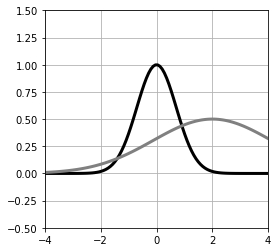

In [108]:
def gauss(mu, sigma, a):
    return a * np.exp( -(x - mu)**2 / sigma**2 )

x = np.linspace(-4, 4, 100)
plt.figure(figsize=(4,4))
plt.plot(x, gauss(0,1,1), 'black', linewidth=3) #평균 0, 분산 1 a= 1인 가우스 분포 (표준정규분포)
plt.plot(x, gauss(2, 3, 0.5), 'gray', linewidth=3)#평균 2, 분산 3, a= 0.5인 가우스 분포
plt.ylim(-.5, 1.5)
plt.xlim(-4, 4)
plt.grid(True)
plt.show()

#### 2차원 가우스 함수
- 혼합 가우시안 모델에서 사용되는 개념
- input x는 N x 2의 행렬, mu는 크기가 2인 벡터, sigma는 2 x 2 행렬이다.
- $gauss(x, mu, simga)$를 테스트하여 3개의 데이터에 대한 함수값 리턴

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

# 가우스 함수
def gauss(x, mu, sigma):
    N, D = x.shape
    c1 = 1 / (2 * np.pi)**(D / 2)
    c2 = 1 / ( np.linalg.det(sigma)**(1/2) )
    inv_sigma = np.linalg.inv(sigma)
    c3 = x - mu
    c4 = np.dot(c3, inv_sigma)
    c5 = np.zeros(N)
    
    for d in range(D):
        c5 = c5 + c4[:, d] * c3[:, d]
    p = c1 * c2 * np.exp(-c5 / 2)
    return p

In [92]:
x = np.array([ [1,2], [2,1], [3,4] ])
mu = np.array([1,2])
sigma = np.array([ [1,0], [0,1] ])
print(gauss(x, mu, sigma))

[0.15915494 0.05854983 0.00291502]


 #### 위 함수를 등고선과 3D로 시각화함
 - (A): 분포의 중심은 $\mu$ (1, 0.5)
 - (B): $\sigma_{2}=1$로 상향 확산 분포가 됨

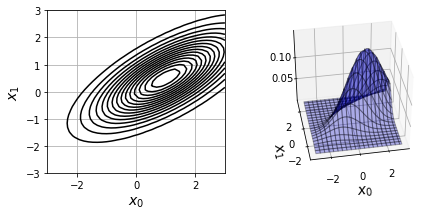

In [87]:
X_range0 = [-3,3]
X_range1= [-3,3]

# 등고선 표시 -------------------
def show_contour_gauss(mu, sig):
    xn = 40 # 등고선 표시 해상도
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0,x1)
    x = np.c_[np.reshape(xx0, xn * xn, 'F'), np.reshape(xx1, xn * xn, 'F')]
    f = gauss(x ,mu, sig)
    f = f.reshape(xn, xn)
    f = f.T
    cont = plt.contour(xx0, xx1, f, 15, colors='k')
    plt.grid(True)

#3D 표시 -----------------------
def show3d_gauss(ax, mu, sig):
    xn = 40 #등고선 표시 해상도
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0,x1)
    x = np.c_[np.reshape(xx0, xn * xn, 'F'), np.reshape(xx1, xn * xn, 'F')]
    f = gauss(x, mu, sig)
    f = f.reshape(xn, xn)
    f = f.T
    ax.plot_surface(xx0, xx1, f,
                    rstride=2, cstride=2, alpha=0.3,
                    color='blue', edgecolor='black')

#메인 ----------------------
mu = np.array([1, 0.5]) # (A)
sigma = np.array([ [2,1], [1,1] ]) # (B)
Fig = plt.figure(1, figsize=(7,3))
Fig.add_subplot(1,2,1)
show_contour_gauss(mu, sigma)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
Ax = Fig.add_subplot(1,2,2,projection='3d')
show3d_gauss(Ax, mu, sigma)
Ax.set_zticks([0.05, 0.10])
Ax.set_xlabel('$x_0$', fontsize=14)
Ax.set_ylabel('$x_1$', fontsize=14)
Ax.view_init(40, -100)
plt.show()